<a href="https://colab.research.google.com/github/ericyoc/crypto_and_security_principles_poc/blob/main/crypto_and_security_principles_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install matplotlib networkx prettytable cryptography sympy

In [2]:
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
from prettytable import PrettyTable
from cryptography.hazmat.primitives.asymmetric import rsa, padding, utils
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.serialization import Encoding, PublicFormat
import base64
import sympy
import textwrap

In [3]:
def generate_rsa_keys():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048
    )
    public_key = private_key.public_key()
    return private_key, public_key

In [4]:
def rsa_encrypt(message, public_key):
    ciphertext = public_key.encrypt(
        message.encode(),
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return ciphertext

In [5]:
def rsa_decrypt(ciphertext, private_key):
    plaintext = private_key.decrypt(
        ciphertext,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return plaintext.decode()

In [6]:
def rsa_sign(message, private_key):
    signature = private_key.sign(
        message.encode(),
        padding.PSS(
            mgf=padding.MGF1(hashes.SHA256()),
            salt_length=padding.PSS.MAX_LENGTH
        ),
        hashes.SHA256()
    )
    return signature

In [7]:
def rsa_verify(message, signature, public_key):
    try:
        public_key.verify(
            signature,
            message.encode(),
            padding.PSS(
                mgf=padding.MGF1(hashes.SHA256()),
                salt_length=padding.PSS.MAX_LENGTH
            ),
            hashes.SHA256()
        )
        return True
    except:
        return False

In [8]:
def diffie_hellman_key_exchange():
    p = 23  # A prime number
    g = 5   # A primitive root modulo p
    a = random.randint(1, p-1)
    b = random.randint(1, p-1)
    A = (g ** a) % p
    B = (g ** b) % p
    s_alice = (B ** a) % p
    s_bob = (A ** b) % p
    return s_alice == s_bob, s_alice

In [9]:
def one_way_function(x):
    return (x**2 + 7*x + 5) % 1000

In [10]:
def modular_exponentiation(base, exponent, modulus):
    result = 1
    while exponent > 0:
        if exponent & 1:
            result = (result * base) % modulus
        exponent = exponent >> 1
        base = (base * base) % modulus
    return result

In [11]:
def discrete_log(g, h, p):
    # Naive implementation, not efficient for large numbers
    for x in range(1, p):
        if modular_exponentiation(g, x, p) == h:
            return x
    return None

In [12]:
def find_rsa_key():
    p = sympy.randprime(100, 1000)
    q = sympy.randprime(100, 1000)
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 65537
    d = sympy.mod_inverse(e, phi)
    return (e, n), (d, n)

In [13]:
def pkcs1_v1_5_pad(message, key_size):
    padding_string = b'\x00\x02' + bytes([random.randint(1, 255) for _ in range(key_size - len(message) - 3)]) + b'\x00'
    return padding_string + message.encode()

In [14]:
def signature_message_recovery(signature, public_key):
    # This is a simplified example and not secure for real use
    e, n = public_key
    return pow(signature, e, n)

In [15]:
def signature_appendix(message, private_key):
    # This is a simplified example and not secure for real use
    d, n = private_key
    hash_value = hash(message) % n
    return pow(hash_value, d, n)

In [16]:
def simulate_https_upgrade():
    return "HTTP/1.1 301 Moved Permanently\nLocation: https://example.com\n\n"

In [17]:
def demonstrate_mixed_content():
    return """
    <html>
    <head>
        <title>Mixed Content Example</title>
    </head>
    <body>
        <img src="http://example.com/image.jpg"> <!-- Insecure content -->
        <script src="https://example.com/script.js"></script> <!-- Secure content -->
    </body>
    </html>
    """

In [18]:
def plot_rsa_process():
    plt.figure(figsize=(10, 6))
    G = nx.DiGraph()
    G.add_edge("Plaintext", "Encryption")
    G.add_edge("Public Key", "Encryption")
    G.add_edge("Encryption", "Ciphertext")
    G.add_edge("Ciphertext", "Decryption")
    G.add_edge("Private Key", "Decryption")
    G.add_edge("Decryption", "Plaintext")

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
    edge_labels = {("Plaintext", "Encryption"): "Input",
                   ("Public Key", "Encryption"): "Use",
                   ("Encryption", "Ciphertext"): "Output",
                   ("Ciphertext", "Decryption"): "Input",
                   ("Private Key", "Decryption"): "Use",
                   ("Decryption", "Plaintext"): "Output"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("RSA Encryption and Decryption Process")
    plt.axis('off')
    plt.savefig('rsa_process.png')
    plt.show()

In [19]:
def plot_diffie_hellman():
    plt.figure(figsize=(10, 6))
    G = nx.Graph()
    G.add_edge("Alice", "Public Channel", weight=2)
    G.add_edge("Bob", "Public Channel", weight=2)
    G.add_edge("Alice", "Shared Secret", weight=1)
    G.add_edge("Bob", "Shared Secret", weight=1)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10, font_weight='bold')
    edge_labels = {("Alice", "Public Channel"): "A = g^a mod p",
                   ("Bob", "Public Channel"): "B = g^b mod p",
                   ("Alice", "Shared Secret"): "S = B^a mod p",
                   ("Bob", "Shared Secret"): "S = A^b mod p"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Diffie-Hellman Key Exchange")
    plt.axis('off')
    plt.savefig('diffie_hellman.png')
    plt.show()

In [20]:
def plot_one_way_function():
    plt.figure(figsize=(10, 6))
    x = range(50)
    y = [one_way_function(i) for i in x]
    plt.scatter(x, y)
    plt.title("One-way Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.savefig('one_way_function.png')
    plt.show()

In [21]:
def plot_discrete_log():
    plt.figure(figsize=(10, 6))
    p = 23
    g = 5
    x = range(1, p)
    y = [modular_exponentiation(g, i, p) for i in x]
    plt.scatter(x, y)
    plt.title("Discrete Logarithm Problem")
    plt.xlabel("x")
    plt.ylabel("g^x mod p")
    plt.savefig('discrete_log.png')
    plt.show()

In [22]:
def plot_https_upgrade():
    plt.figure(figsize=(10, 6))
    G = nx.DiGraph()
    G.add_edge("Client", "HTTP Request")
    G.add_edge("HTTP Request", "Server")
    G.add_edge("Server", "301 Redirect")
    G.add_edge("301 Redirect", "Client")
    G.add_edge("Client", "HTTPS Request")
    G.add_edge("HTTPS Request", "Server")

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightyellow', node_size=3000, font_size=10, font_weight='bold')
    edge_labels = {("Client", "HTTP Request"): "1. HTTP",
                   ("HTTP Request", "Server"): "2. Insecure",
                   ("Server", "301 Redirect"): "3. Redirect",
                   ("301 Redirect", "Client"): "4. To HTTPS",
                   ("Client", "HTTPS Request"): "5. HTTPS",
                   ("HTTPS Request", "Server"): "6. Secure"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("HTTP to HTTPS Upgrade Process")
    plt.axis('off')
    plt.savefig('https_upgrade.png')
    plt.show()

In [23]:
def create_results_table():
    table = PrettyTable()
    table.field_names = ["Concept", "Explanation", "Importance in Cybersecurity", "Domain"]
    table.add_row(["RSA Cryptography",
                   "Public-key crypto system for secure data transmission",
                   "Enables secure communication over insecure channels",
                   "Cryptography"])
    table.add_row(["Public Key Crypto - Encryption",
                   "Use of public key for message encryption",
                   "Allows secure message sending without prior key exchange",
                   "Cryptography"])
    table.add_row(["Public Key Crypto - Signatures",
                   "Use of private key for message signing",
                   "Provides authentication and non-repudiation",
                   "Cryptography"])
    table.add_row(["Diffie-Hellman Key Exchange",
                   "Method of securely exchanging cryptographic keys over a public channel",
                   "Allows two parties to jointly establish a shared secret over an insecure channel",
                   "Key Exchange"])
    table.add_row(["One-way Functions",
                   "Functions that are easy to compute but difficult to reverse",
                   "Fundamental to many cryptographic protocols, including password hashing",
                   "Cryptography"])
    table.add_row(["Modular Math",
                   "Arithmetic system with finite set of integers",
                   "Forms the basis for many cryptographic algorithms",
                   "Mathematics"])
    table.add_row(["Discrete Logarithms",
                   "The inverse operation of modular exponentiation",
                   "The difficulty of this problem is the basis for several cryptographic systems",
                   "Cryptography"])
    table.add_row(["Finding RSA Key",
                   "Process of generating public and private keys for RSA",
                   "Essential for setting up RSA cryptosystem",
                   "Cryptography"])
    table.add_row(["PKCS Padding",
                   "Padding schemes used in public-key cryptosystems",
                   "Ensures security properties in encryption and signing operations",
                   "Cryptography"])
    table.add_row(["Signatures - Message Recovery",
                   "Signature scheme where the message can be recovered from the signature",
                   "Allows verification and message recovery in one step",
                   "Cryptography"])
    table.add_row(["Signatures - Appendix",
                   "Signature scheme where the signature is appended to the message",
                   "Provides a way to verify the integrity and authenticity of a message",
                   "Cryptography"])
    table.add_row(["HTTP -> HTTPS Upgrade",
                   "Process of redirecting HTTP requests to HTTPS",
                   "Ensures secure communication by default",
                   "Network Security"])
    table.add_row(["Mixed Content",
                   "Web pages containing both HTTP and HTTPS resources",
                   "Can lead to security vulnerabilities if not handled properly",
                   "Web Security"])

    print(table)

    with open('results_table.txt', 'w') as f:
        f.write(str(table))

In [24]:
def wrap_text(text, width=70):
    """Wrap text to a specified width."""
    return "\n".join(textwrap.wrap(text, width=width))

In [25]:
def main():
    print("1. RSA Cryptography")
    private_key, public_key = generate_rsa_keys()
    message = "Hello, Bob! This is a secret message from Alice."
    ciphertext = rsa_encrypt(message, public_key)
    decrypted_message = rsa_decrypt(ciphertext, private_key)
    print(f"Original message: {message}")
    print(f"Decrypted message: {decrypted_message}")

    print("\n2. Basic idea of public key crypto - encryption")
    print("Demonstrated in the RSA example above.")

    print("\n3. Basic idea of public key crypto - signatures")
    signature = rsa_sign(message, private_key)
    is_valid = rsa_verify(message, signature, public_key)
    print(f"Signature valid: {is_valid}")

    print("\n4. Diffie-Hellman Key Exchange")
    success, shared_secret = diffie_hellman_key_exchange()
    print(f"Diffie-Hellman key exchange successful: {success}")
    print(f"Shared secret: {shared_secret}")

    print("\n5. One-way Functions")
    x = 42
    y = one_way_function(x)
    print(f"One-way function: f({x}) = {y}")

    print("\n6. Modular Math")
    base, exponent, modulus = 5, 13, 23
    result = modular_exponentiation(base, exponent, modulus)
    print(f"{base}^{exponent} mod {modulus} = {result}")

    print("\n7. Discrete Logarithms")
    g, h, p = 5, 8, 23
    x = discrete_log(g, h, p)
    print(f"Discrete log of {h} base {g} mod {p} is {x}")

    print("\n8. Finding a key (in the context of RSA)")
    public_key, private_key = find_rsa_key()
    print(f"Generated RSA public key: {public_key}")
    print(f"Generated RSA private key: {private_key}")

    print("\n9. Example of RSA")
    print("Demonstrated in item 1.")

    print("\n10. PKCS (Public Key Cryptography Standards) example")
    padded_message = pkcs1_v1_5_pad(message, 256)
    print(f"PKCS#1 v1.5 padded message: {base64.b64encode(padded_message)}")

    print("\n11. Signatures – message recovery")
    recovered_message = signature_message_recovery(12345, (65537, 3233))
    print(f"Recovered message from signature: {recovered_message}")

    print("\n12. Signatures - Appendix")
    message = "Hello, this is a test message."
    signature = signature_appendix(message, (2753, 3233))
    print(f"Message: {message}")
    print(f"Signature (appendix): {signature}")

    print("\n13. HTTP -> HTTPS upgrade (simulating the process)")
    upgrade_response = simulate_https_upgrade()
    print(f"HTTP to HTTPS upgrade response:\n{upgrade_response}")

    print("\n14. Mixed content: http and https (demonstrating the difference)")
    mixed_content = demonstrate_mixed_content()
    print(f"Example of HTML with mixed content:\n{mixed_content}")

    print("\nDisplaying visualizations with explanations...")

    print("\n1. RSA Encryption and Decryption Process")
    plot_rsa_process()
    print(wrap_text(
        "Explanation: This diagram illustrates the RSA encryption and decryption process. "
        "The plaintext is encrypted using the recipient's public key, creating ciphertext. "
        "The ciphertext can only be decrypted using the recipient's private key, ensuring "
        "the confidentiality of the message."
    ))

    print("\n2. Diffie-Hellman Key Exchange")
    plot_diffie_hellman()
    print(wrap_text(
        "Explanation: This diagram shows the Diffie-Hellman key exchange process. "
        "Alice and Bob can establish a shared secret over an insecure channel without "
        "ever sharing the actual secret. They exchange public values (g^a mod p and g^b mod p) "
        "and use their private values to compute the same shared secret."
    ))

    print("\n3. One-way Function")
    plot_one_way_function()
    print(wrap_text(
        "Explanation: This scatter plot demonstrates a one-way function. "
        "Each input (x-axis) maps to an output (y-axis), but it's computationally "
        "difficult to determine the input from a given output. This property is "
        "crucial for many cryptographic applications, including password hashing."
    ))

    print("\n4. Discrete Logarithm Problem")
    plot_discrete_log()
    print(wrap_text(
        "Explanation: This plot illustrates the discrete logarithm problem. "
        "While it's easy to compute g^x mod p (y-axis) for a given x (x-axis), "
        "it's computationally difficult to find x given g^x mod p. This asymmetry "
        "forms the basis of several cryptographic systems, including Diffie-Hellman."
    ))

    print("\n5. HTTP to HTTPS Upgrade Process")
    plot_https_upgrade()
    print(wrap_text(
        "Explanation: This diagram shows the process of upgrading from HTTP to HTTPS. "
        "When a client makes an HTTP request, the server responds with a 301 redirect "
        "to the HTTPS version of the site. This ensures that subsequent communications "
        "are encrypted, enhancing the security of the connection."
    ))

    # Create and display results table
    print("\nResults Table:")
    create_results_table()

1. RSA Cryptography
Original message: Hello, Bob! This is a secret message from Alice.
Decrypted message: Hello, Bob! This is a secret message from Alice.

2. Basic idea of public key crypto - encryption
Demonstrated in the RSA example above.

3. Basic idea of public key crypto - signatures
Signature valid: True

4. Diffie-Hellman Key Exchange
Diffie-Hellman key exchange successful: True
Shared secret: 12

5. One-way Functions
One-way function: f(42) = 63

6. Modular Math
5^13 mod 23 = 21

7. Discrete Logarithms
Discrete log of 8 base 5 mod 23 is 6

8. Finding a key (in the context of RSA)
Generated RSA public key: (65537, 306143)
Generated RSA private key: (75017, 306143)

9. Example of RSA
Demonstrated in item 1.

10. PKCS (Public Key Cryptography Standards) example
PKCS#1 v1.5 padded message: b'AAL6DLA5QZMgQ5obc1E/CmgfpyCPAcPLx0arkVur+kOfHiyZiAtIHdICICXggAV111HJUvRQcC5MXYS6ymSv6/qrPpW9TSE+hE/rdHXKrtbscms3yM08t7Gzcki4/UR31BXXiHRpsxJRGLvXE3Hl1JAF5e9ZxXkPD+x5FCfHCbPMKQ/s+S/XsepITHTP1Ww

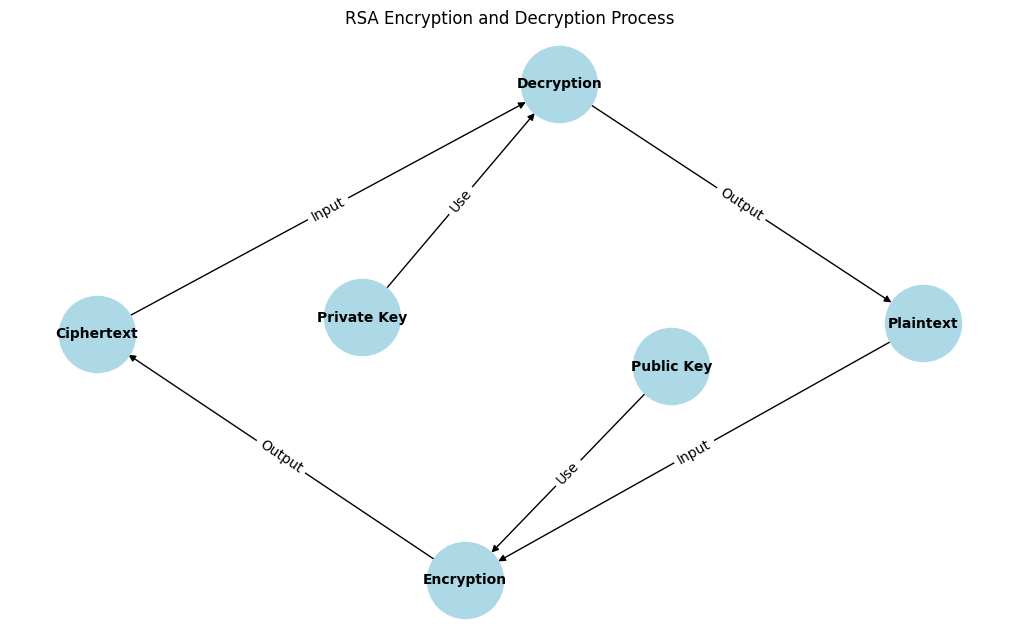

Explanation: This diagram illustrates the RSA encryption and
decryption process. The plaintext is encrypted using the recipient's
public key, creating ciphertext. The ciphertext can only be decrypted
using the recipient's private key, ensuring the confidentiality of the
message.

2. Diffie-Hellman Key Exchange


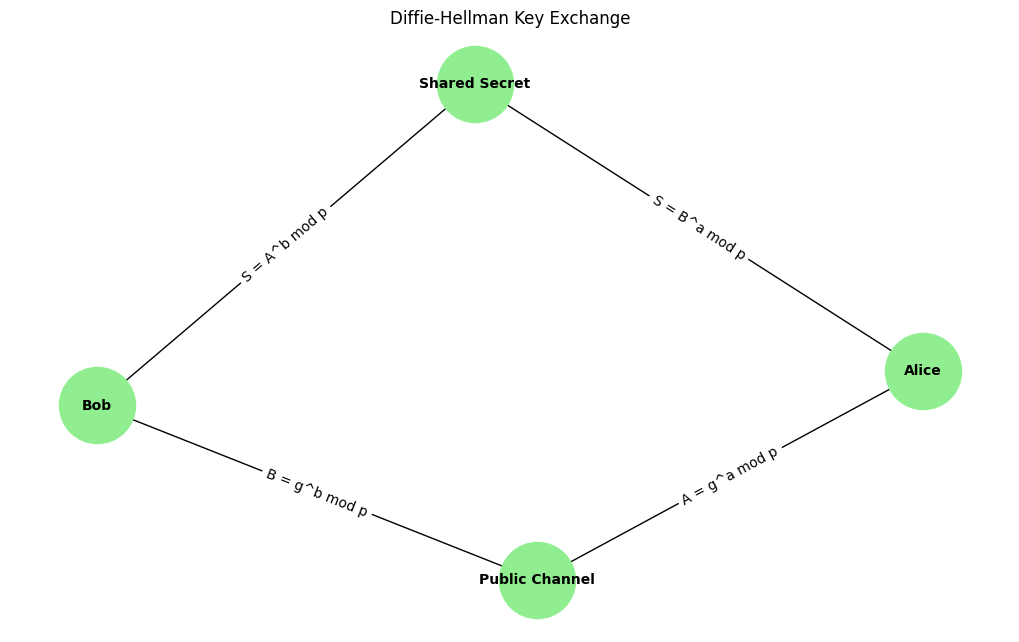

Explanation: This diagram shows the Diffie-Hellman key exchange
process. Alice and Bob can establish a shared secret over an insecure
channel without ever sharing the actual secret. They exchange public
values (g^a mod p and g^b mod p) and use their private values to
compute the same shared secret.

3. One-way Function


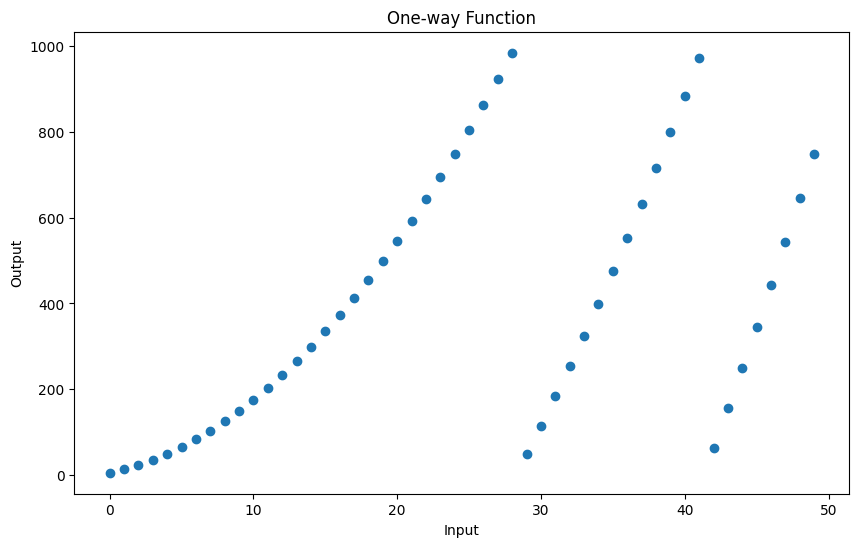

Explanation: This scatter plot demonstrates a one-way function. Each
input (x-axis) maps to an output (y-axis), but it's computationally
difficult to determine the input from a given output. This property is
crucial for many cryptographic applications, including password
hashing.

4. Discrete Logarithm Problem


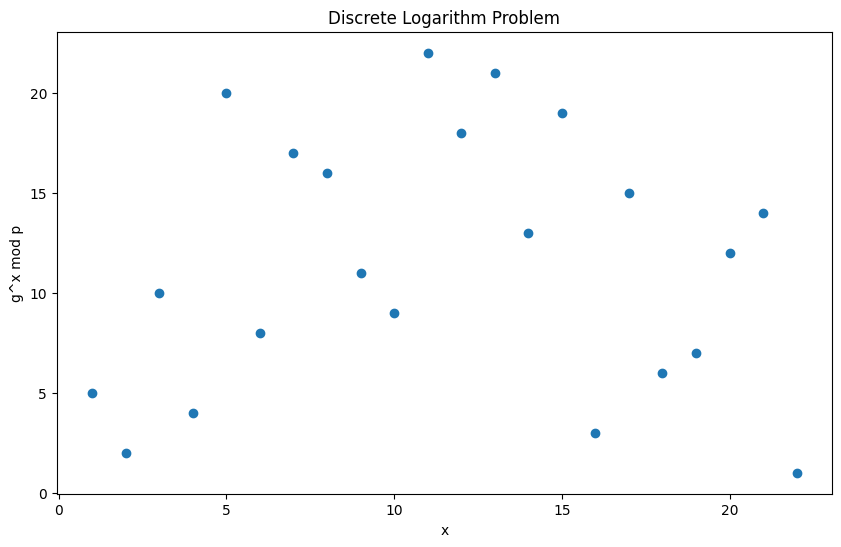

Explanation: This plot illustrates the discrete logarithm problem.
While it's easy to compute g^x mod p (y-axis) for a given x (x-axis),
it's computationally difficult to find x given g^x mod p. This
asymmetry forms the basis of several cryptographic systems, including
Diffie-Hellman.

5. HTTP to HTTPS Upgrade Process


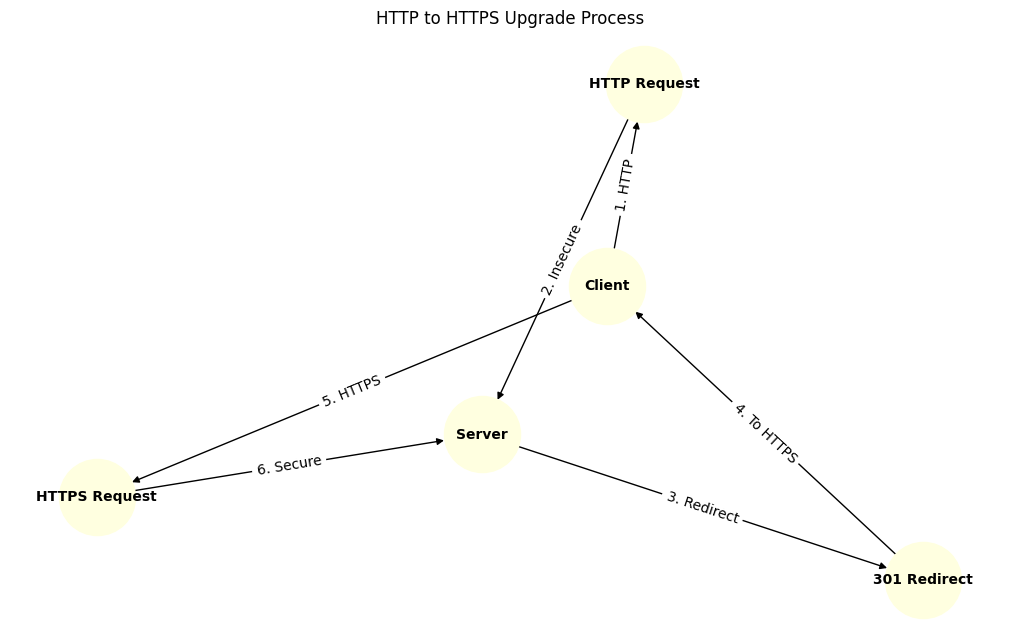

Explanation: This diagram shows the process of upgrading from HTTP to
HTTPS. When a client makes an HTTP request, the server responds with a
301 redirect to the HTTPS version of the site. This ensures that
subsequent communications are encrypted, enhancing the security of the
connection.

Results Table:
+--------------------------------+------------------------------------------------------------------------+----------------------------------------------------------------------------------+------------------+
|            Concept             |                              Explanation                               |                           Importance in Cybersecurity                            |      Domain      |
+--------------------------------+------------------------------------------------------------------------+----------------------------------------------------------------------------------+------------------+
|        RSA Cryptography        |         Public-key crypto syst

In [26]:
if __name__ == "__main__":
    main()